In [1]:
from IPython.display import display, Image

In [2]:
import pandas as pd

In [3]:
train_path = 'data/train/'
train_files_path =  [train_path + file_name for file_name in os.listdir(train_path)]

In [4]:
labels = []

for files_path in train_files_path:
    labels.append(files_path.split('/')[2].split('.')[0])

In [5]:
train_path_frame = pd.DataFrame({
    'path': train_files_path,
    'label': labels
})

train_path_frame = train_path_frame.sample(frac=1)

train_path_frame.head()

,path,label
24294,data/train/dog.9363.jpg,dog
24562,data/train/dog.9604.jpg,dog
18352,data/train/dog.4014.jpg,dog
21125,data/train/dog.6510.jpg,dog
15424,data/train/dog.138.jpg,dog


In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
train_path, valid_path = train_test_split(train_path_frame, test_size=0.2, random_state=42)
train_path.shape, valid_path.shape

((20000, 2), (5000, 2))

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
)

valid_image_gen = ImageDataGenerator(
    rescale=1./255,
)

In [10]:
train_data_generator = train_image_gen.flow_from_dataframe(
    dataframe = train_path,
    x_col="path",
    y_col="label",
    target_size=(128, 128),
    class_mode="binary",
    batch_size=100
)

valid_data_generator = valid_image_gen.flow_from_dataframe(
    dataframe = valid_path,
    x_col="path",
    y_col="label",
    target_size=(128, 128),
    class_mode="binary",
    batch_size=100
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.activations import relu, sigmoid

In [12]:
model = Sequential()

model.add(Input(shape=(128,128,3), name='input'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation=relu, name='conv2D_0'))
model.add(MaxPooling2D(2,2, name='maxpooling2D_0'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation=relu, name='conv2D_1'))
model.add(MaxPooling2D(2,2, name='maxpooling2D_1'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation=relu, name='conv2D_2'))
model.add(MaxPooling2D(2,2, name='maxpooling2D_2'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation=relu, name='conv2D_3'))
model.add(MaxPooling2D(2,2, name='maxpooling2D_3'))
model.add(Flatten(name='flatten_0'))
model.add(Dropout(rate=0.5, name='dropout_0'))
model.add(Dense(256, activation=relu, name='dense_0'))
model.add(Dense(1, activation=sigmoid, name='output'))

In [13]:
from keras.utils import plot_model

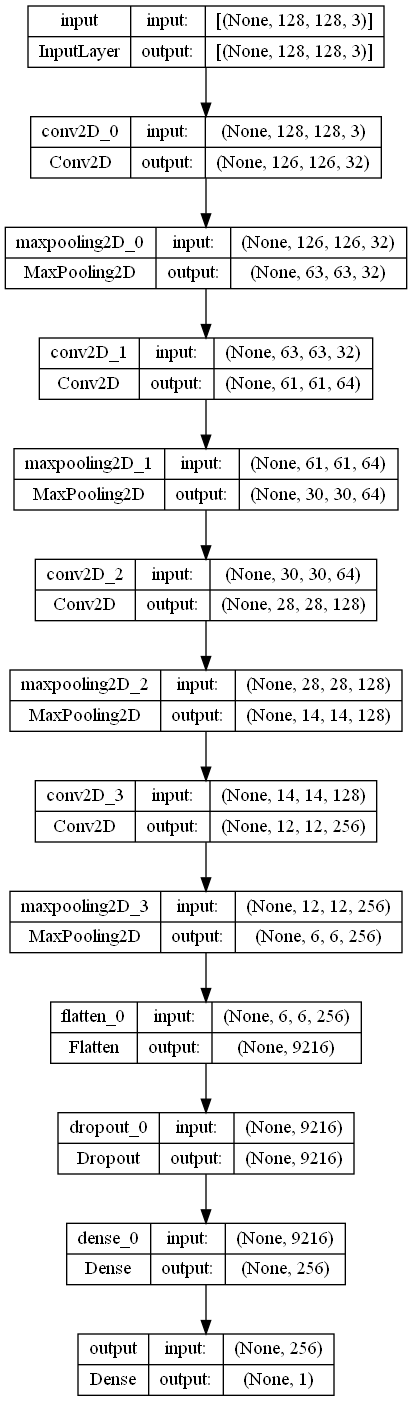

In [14]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
from visualkeras import layered_view

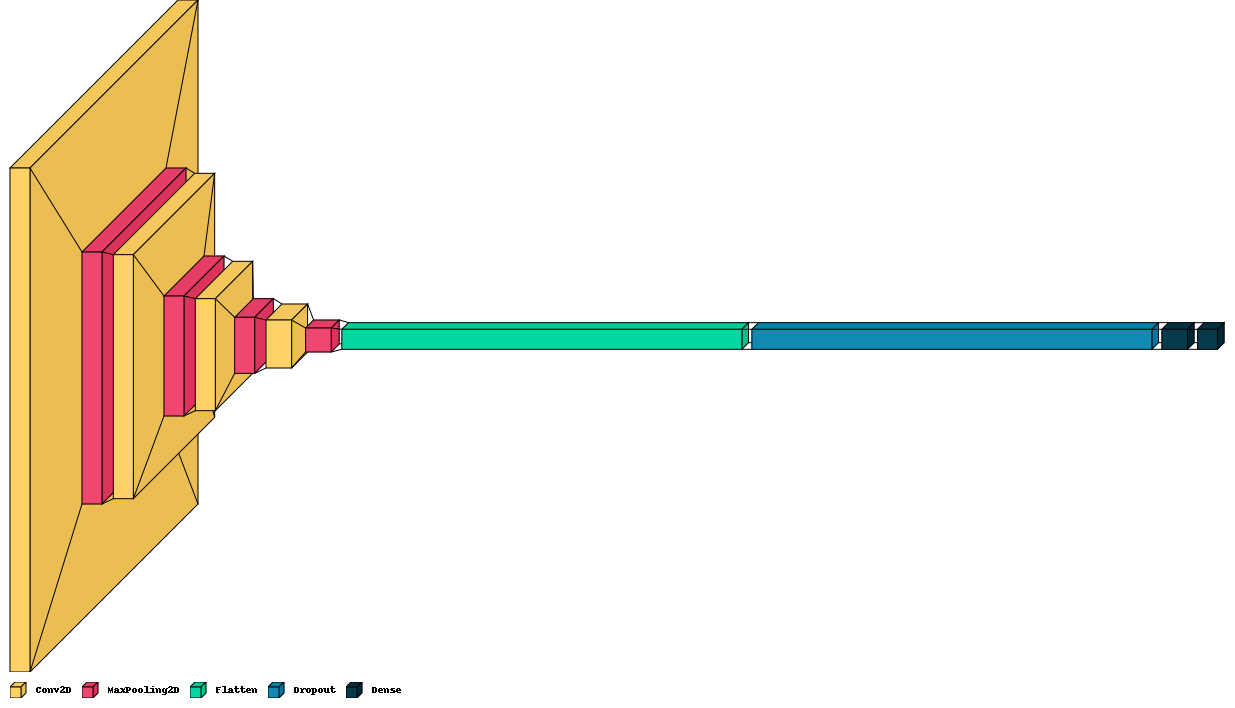

In [16]:
layered_view(model, legend=True)

In [17]:
from keras.optimizers import Adam

In [18]:
opt = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

In [19]:
from keras.callbacks import EarlyStopping

In [20]:
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="max",
    restore_best_weights=True
)

In [21]:
from keras.losses import BinaryCrossentropy

In [22]:
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])
hist = model.fit(train_data_generator, epochs=100, callbacks=[callback])

Epoch 1/100
200/200 [==============================] - 72s 350ms/step - loss: 0.6464 - accuracy: 0.6145
Epoch 2/100
200/200 [==============================] - 69s 343ms/step - loss: 0.5457 - accuracy: 0.7207
Epoch 3/100
200/200 [==============================] - 69s 344ms/step - loss: 0.4935 - accuracy: 0.7606
Epoch 4/100
200/200 [==============================] - 69s 346ms/step - loss: 0.4412 - accuracy: 0.7925
Epoch 5/100
200/200 [==============================] - 69s 344ms/step - loss: 0.4036 - accuracy: 0.8156
Epoch 6/100
200/200 [==============================] - 68s 341ms/step - loss: 0.3751 - accuracy: 0.8336
Epoch 7/100
200/200 [==============================] - 68s 341ms/step - loss: 0.3483 - accuracy: 0.8459
Epoch 8/100
200/200 [==============================] - 68s 342ms/step - loss: 0.3166 - accuracy: 0.8634
Epoch 9/100
200/200 [==============================] - 68s 341ms/step - loss: 0.3026 - accuracy: 0.8705
Epoch 10/100
200/200 [==============================] - 68s 341m

In [23]:
validation = model.evaluate(valid_data_generator)

50/50 [==============================] - 5s 97ms/step - loss: 0.1982 - accuracy: 0.9168


In [26]:
model.save('model_0.91.h5')